In [1]:
#imports
import pandas as pd
import numpy as np
from scipy.stats import trim_mean 
from statsmodels import robust     
import wquantiles                   

import seaborn as sns
import matplotlib.pylab as plt

In [91]:
#Open Data
data = pd.read_csv('./data/diamonds_train.csv')
print(data.info())
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   city     40455 non-null  object 
 3   depth    40455 non-null  float64
 4   table    40455 non-null  float64
 5   x        40455 non-null  float64
 6   y        40455 non-null  float64
 7   z        40455 non-null  float64
 8   cut      40455 non-null  object 
 9   color    40455 non-null  object 
 10  clarity  40455 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 3.4+ MB
None


,price,carat,city,depth,table,x,y,z,cut,color,clarity
0,4268,1.21,Dubai,62.4,58.0,6.83,6.79,4.25,Premium,J,VS2
1,505,0.32,Kimberly,63.0,57.0,4.35,4.38,2.75,Very Good,H,VS2
2,2686,0.71,Las Vegas,65.5,55.0,5.62,5.53,3.65,Fair,G,VS1
3,738,0.41,Kimberly,63.8,56.0,4.68,4.72,3.00,Good,D,SI1
4,4882,1.02,Dubai,60.5,59.0,6.55,6.51,3.95,Ideal,G,SI1


In [11]:
#Compruebo si mi DF tiene nulos
data.isnull().sum()

price      0
carat      0
city       0
depth      0
table      0
x          0
y          0
z          0
cut        0
color      0
clarity    0
dtype: int64

## Data Types

- __Variables numericas:__
    - Continuas: price, carat, depth, table, x, y , z. 
    - Discretas: n/a


- __Variables categoricas:__ 
    - Nominal: City
    - Ordinal: cut, color, clarity


### Variables numericas

In [13]:
data.describe()

,price,carat,depth,table,x,y,z
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,3928.444469,0.797706,61.752841,57.446133,5.729392,5.732819,3.537154
std,3992.416147,0.475544,1.431725,2.233535,1.124453,1.146650,0.697062
min,326.000000,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,945.000000,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,2397.000000,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000
75%,5331.000000,1.040000,62.500000,59.000000,6.540000,6.540000,4.035000
max,18823.000000,4.500000,79.000000,95.000000,10.230000,58.900000,8.060000


#### Varibale Price
**price as p

In [17]:
# Mean
mean_p = data['price'].mean()
print('Mean of price:', mean_p)

Mean of price: 3928.444469163268


In [18]:
# Trimmed mean 
tmean_p = trim_mean(data['price'], 0.1)
print('Trimmed mean of price', tmean_p)

Trimmed mean of price 3153.22252433184


In [31]:
##Comparando medias = hay valores extremos

In [19]:
# Median
median_p = data['price'].median()
print('Median of price:', median_p)

Median of price: 2397.0


In [ ]:
##Hay valores extremos por arriba

In [26]:
#Desviation
dev_p = data['price'].mean() - data['price']
dev_P
print('Price deviation', dev_p.sum())

Price deviation -7.043126970529556e-09


In [30]:
#Mean absolute deviation
mean_dev_p = abs(data['price'].mean() - data['price'])
mean_dev_p
print('Price deviation:', mean_dev_p.sum() / len(mean_dev_p))

Price deviation: 3034.0658933710733


In [35]:
#Variance 
var_p = (data['price'].mean() - data['price'])**2
variance_p = var_p.sum() / (len(var_p) - 1)
print('Variance of price:', variance_p)


Variance of price: 15939386.687768824


In [36]:
# Standard deviation
std_dev_p = data['price'].std()
print('Standard deviation price:', std_dev_p)

Standard deviation price: 3992.4161466170613


In [37]:
##=Los datos están muy dispersos

In [42]:
#Min & Max
min_p = data['price'].min()
max_p = data['price'].max()
print('Max price:', max_p, '\nMin price:', min_p)

Max price: 18823 
Min price: 326


In [38]:
# Range
p_range = data['price'].max() - data['price'].min()
print('Price range:', p_range)

Price range: 18497


In [40]:
# Percentiles 
per_75 = data['price'].quantile(0.75)
per_25 = data['price'].quantile(0.25)
per_50 = data['price'].quantile(0.50)  
print('Percentile 75th:', per_75, '\nPercentile 25th:', per_25, '\nPercentile 50th:', per_50)

Percentile 75th: 5331.0 
Percentile 25th: 945.0 
Percentile 50th: 2397.0


In [41]:
# Interquartile range
iqr = per_75 - per_25
print('Interquartile range:', iqr)

Interquartile range: 4386.0


In [44]:
# Percentiles table (equal-count bins)

percentages = [0.05, 0.25, 0.5, 0.75, 0.95]
percentiles = data['price'].quantile(percentages)
df = pd.DataFrame(percentiles)
df.index = [f'{int(p * 100)}%' for p in percentages]
df.transpose()

,5%,25%,50%,75%,95%
price,544.0,945.0,2397.0,5331.0,13132.0


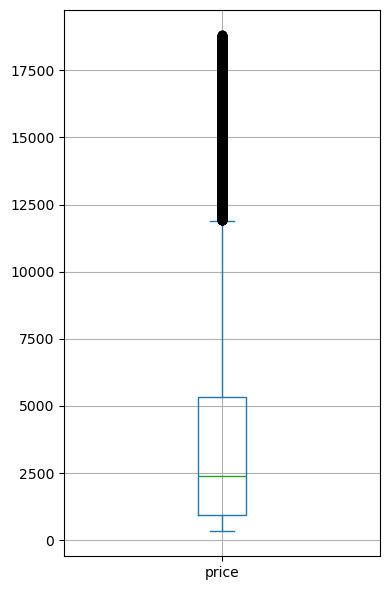

In [99]:
# Boxplot (Matplotlib whiskers implementation = 1.5 IQR)

data_p = data['price']
ax = data_p.plot.box(figsize=(4, 6))
plt.tight_layout()
plt.grid()
plt.show()

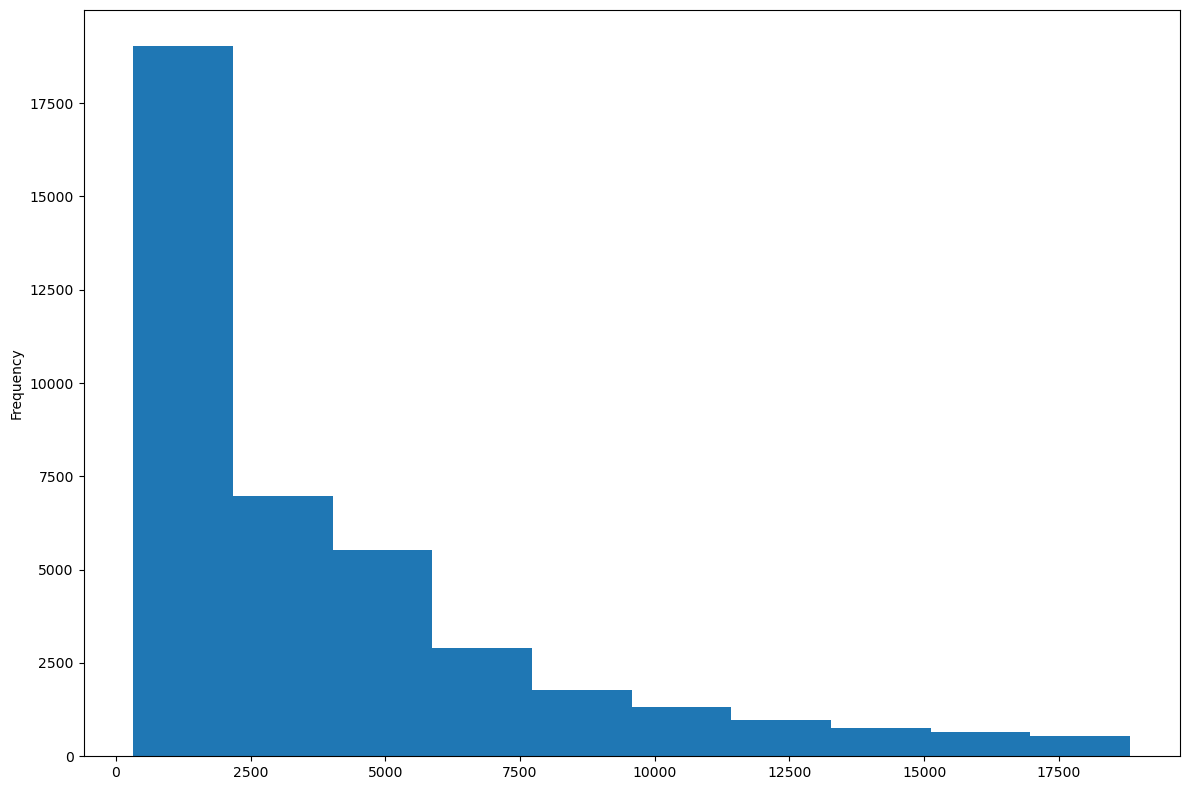

In [76]:
# Histogram
data_p = data['price']
ax = data_p.plot.hist(figsize=(12, 8))
#ax.set_xlabel('Population (millions)')
plt.tight_layout()

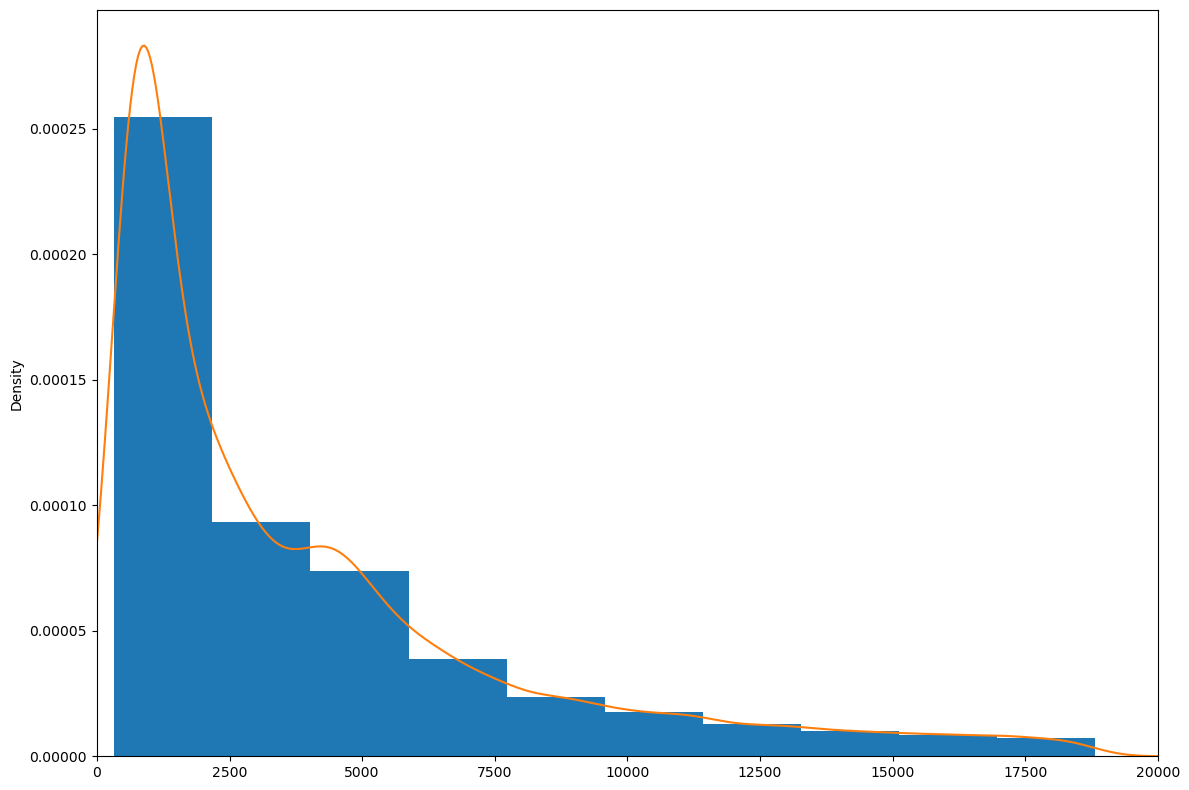

In [89]:
ax = data_p.plot.hist(density=True,
                    xlim=[0, 20000], 
                    figsize=(12, 8))
data_p.plot.density(ax=ax)
plt.tight_layout()

#### Variable carat

In [21]:
# Mean
mean_carat = data['carat'].mean()
print('Mean of carat:', mean_carat)

Mean of carat: 0.7977055988134963


In [22]:
# Trimmed mean 
tmean_carat = trim_mean(data['carat'], 0.1)
print('Trimmed mean of carat', tmean_carat)

Trimmed mean of carat 0.7341171018075081


In [23]:
# Median
median_carat = data['carat'].median()
print('Median of carat:', median_carat)

Median of carat: 0.7
